In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# **Data Visualization**

In [3]:
df = pd.read_csv('final_condo_data.csv')
df.head(10)

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Furnishing,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label,amenities_count,size_category,occupancy_demand
0,101398,106,5,3,1,1,1,1,Fully Furnished,4.3,66.5,1,1,1,1,1,2,9,3,1
1,92131,48,4,2,1,1,1,1,Fully Furnished,4.5,152.0,1,1,1,1,1,2,9,1,2
2,42191,38,1,1,1,1,0,1,Semi Furnished,4.3,23.0,1,0,1,1,1,1,7,1,2
3,81355,40,5,1,1,1,1,1,Fully Furnished,4.4,7658.0,1,1,1,1,1,2,9,1,2
4,13066,28,0,1,1,1,0,1,Unfurnished,4.3,66.5,0,1,0,1,0,0,5,0,2
5,87820,52,5,2,1,1,1,1,Fully Furnished,4.3,66.5,1,1,1,1,1,2,9,2,1
6,127250,110,6,2,1,1,1,1,Fully Furnished,4.6,243.0,1,1,1,1,1,2,9,3,1
7,18506,30,1,1,1,1,0,0,Unfurnished,4.3,66.5,0,0,0,0,1,0,3,1,2
8,35073,31,2,2,1,1,0,1,Semi Furnished,4.3,66.5,1,1,0,1,1,1,7,1,2
9,145568,52,5,2,1,1,1,1,Fully Furnished,4.3,66.5,1,1,1,1,1,2,9,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              2999 non-null   float64
 10  ReviewsCount        2999 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

In [5]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              2999 non-null   float64
 10  ReviewsCount        2999 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

## **Scatter Plot**

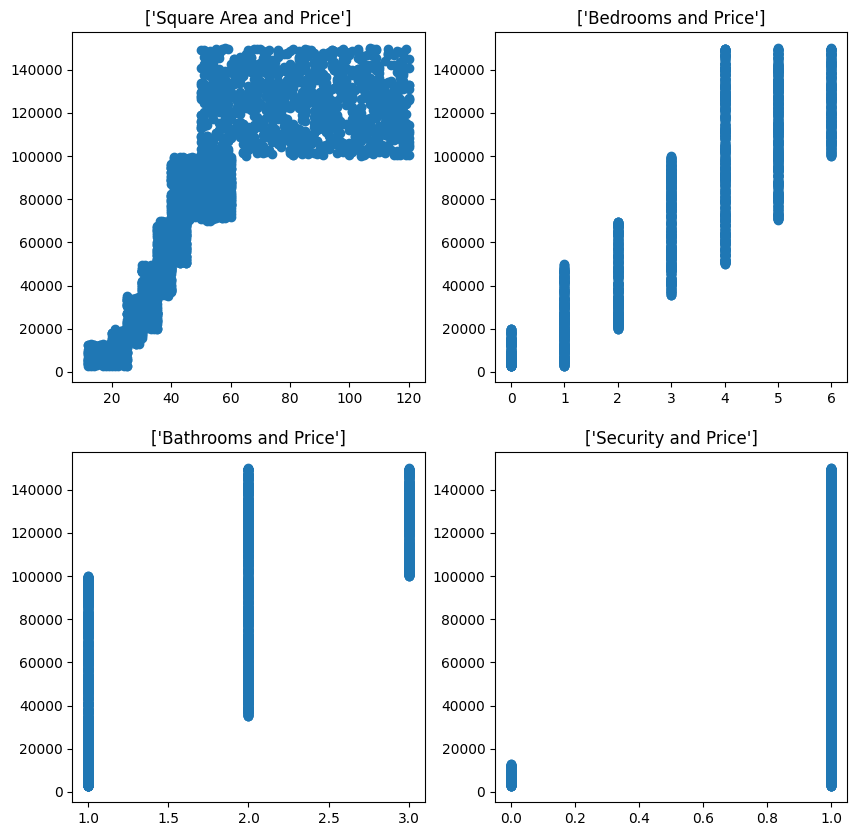

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Square Area"], df["Price"])
ax[0, 1].scatter(df["Bedrooms"], df["Price"])
ax[1, 0].scatter(df["Bathrooms"], df["Price"])
ax[1, 1].scatter(df["Security"], df["Price"])

ax[0, 0].set_title(["Square Area and Price"])
ax[0, 1].set_title(["Bedrooms and Price"])
ax[1, 0].set_title(["Bathrooms and Price"])
ax[1, 1].set_title(["Security and Price"])

plt.show()

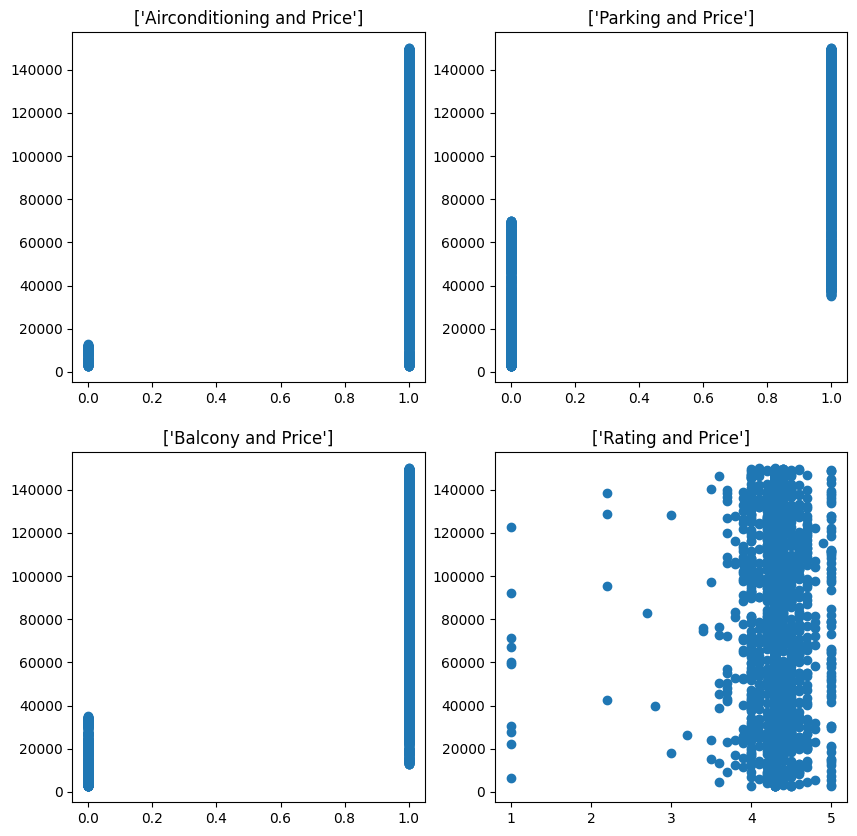

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Airconditioning"], df["Price"])
ax[0, 1].scatter(df["Parking"], df["Price"])
ax[1, 0].scatter(df["Balcony"], df["Price"])
ax[1, 1].scatter(df["Rating"], df["Price"])

ax[0, 0].set_title(["Airconditioning and Price"])
ax[0, 1].set_title(["Parking and Price"])
ax[1, 0].set_title(["Balcony and Price"])
ax[1, 1].set_title(["Rating and Price"])

plt.show()

Text(0.5, 1.0, "['Function Rooms and Price']")

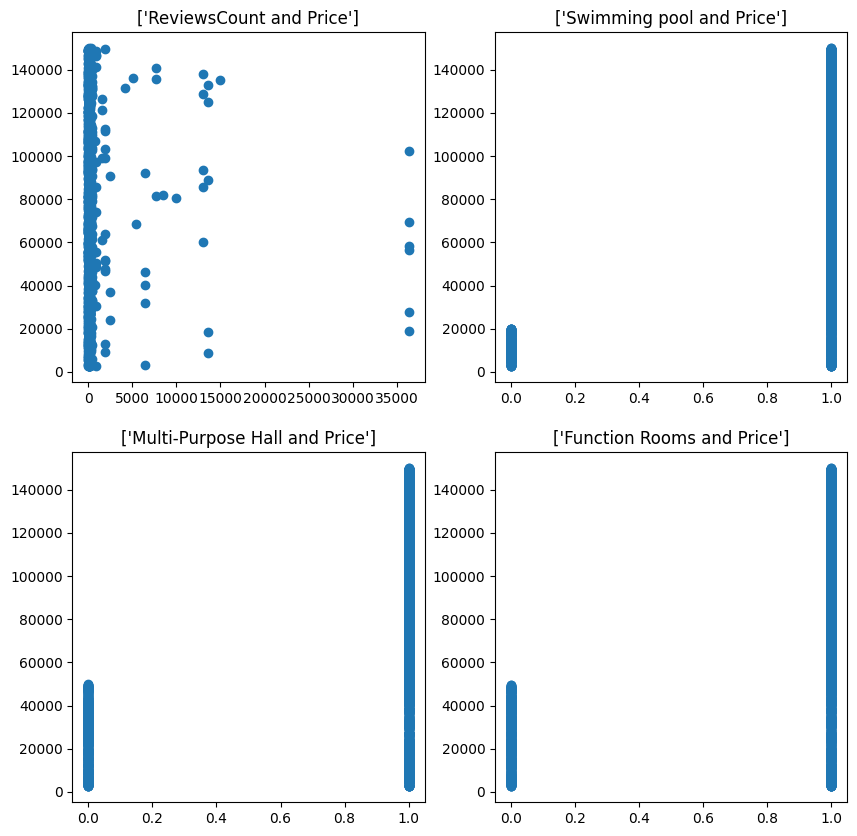

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["ReviewsCount"], df["Price"])
ax[0, 1].scatter(df["Swimming pool"], df["Price"])
ax[1, 0].scatter(df["Multi-Purpose Hall"], df["Price"])
ax[1, 1].scatter(df["Function Rooms"], df["Price"])

ax[0, 0].set_title(["ReviewsCount and Price"])
ax[0, 1].set_title(["Swimming pool and Price"])
ax[1, 0].set_title(["Multi-Purpose Hall and Price"])
ax[1, 1].set_title(["Function Rooms and Price"])

Text(0.5, 1.0, "['furnishing_label and Price']")

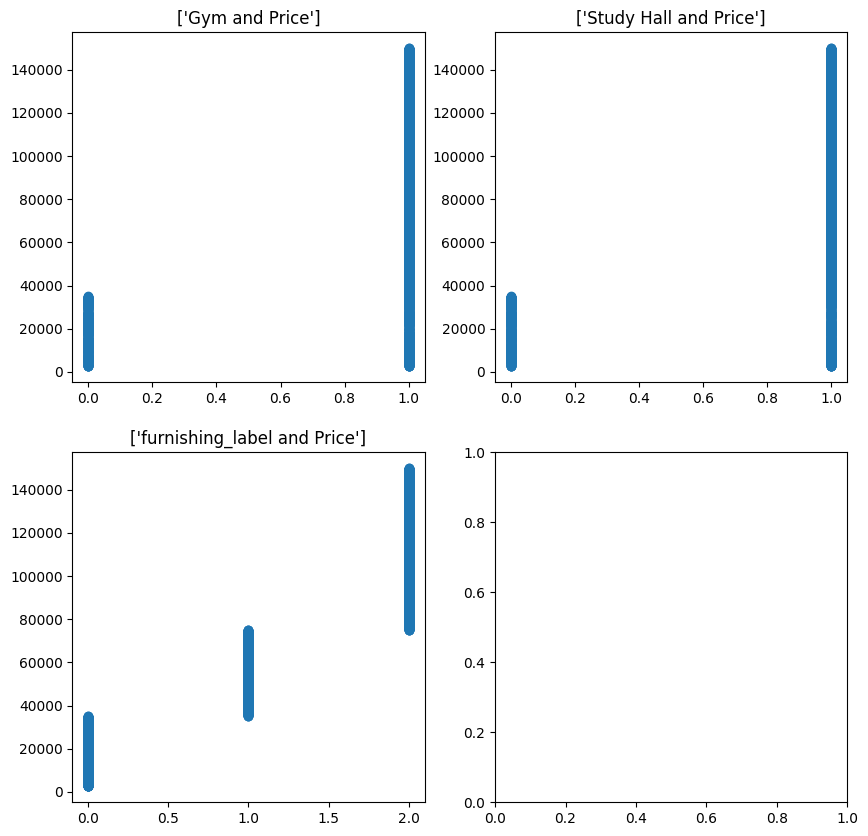

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Gym"], df["Price"])
ax[0, 1].scatter(df["Study Hall"], df["Price"])
ax[1, 0].scatter(df["furnishing_label"], df["Price"])

ax[0, 0].set_title(["Gym and Price"])
ax[0, 1].set_title(["Study Hall and Price"])
ax[1, 0].set_title(["furnishing_label and Price"])

Text(0.5, 1.0, "['occupancy_demand and Price']")

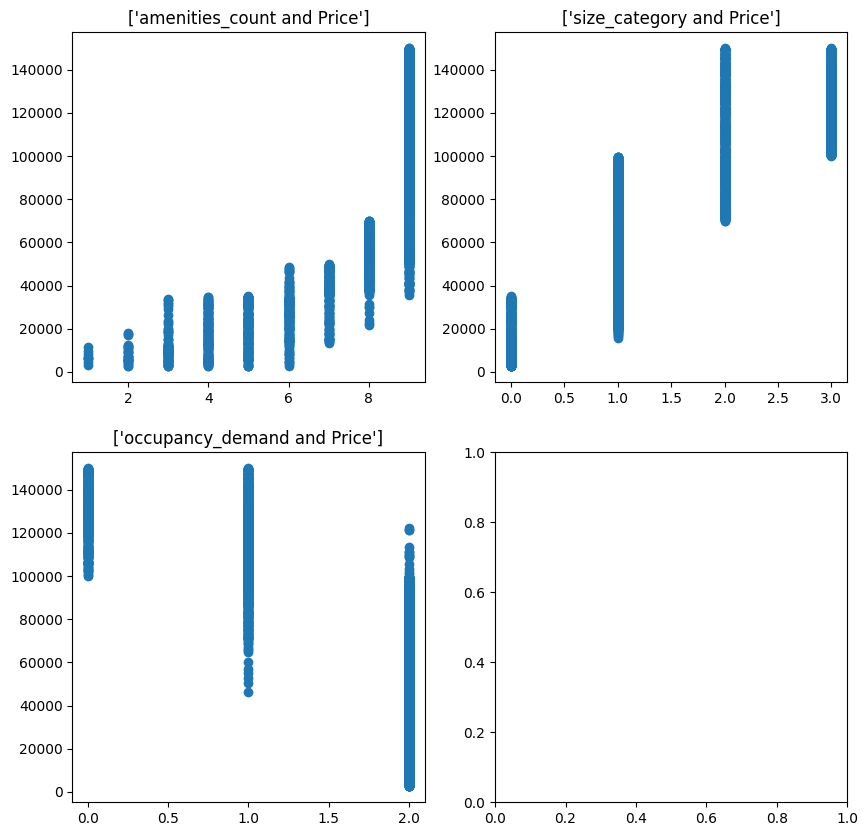

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["amenities_count"], df["Price"])
ax[0, 1].scatter(df["size_category"], df["Price"])
ax[1, 0].scatter(df["occupancy_demand"], df["Price"])

ax[0, 0].set_title(["amenities_count and Price"])
ax[0, 1].set_title(["size_category and Price"])
ax[1, 0].set_title(["occupancy_demand and Price"])

## **Correlation Matrix**

In [12]:
# sns.set_palette('colorblind')
# sns.pairplot(data=df, height=2)

In [13]:
correlation = df.corr(numeric_only=True)
correlation

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label,amenities_count,size_category,occupancy_demand
Price,1.000000,0.840161,0.870431,0.728747,0.312710,0.313422,0.773669,0.586573,0.008037,-0.008091,0.398604,0.507342,0.521076,0.464382,0.469274,0.910991,0.781014,0.885046,-0.794736
Square Area,0.840161,1.000000,0.752723,0.694206,0.249650,0.254696,0.632447,0.458340,0.012538,-0.004363,0.309647,0.399273,0.404346,0.355900,0.358541,0.745909,0.616151,0.934207,-0.787538
Bedrooms,0.870431,0.752723,1.000000,0.641406,0.313986,0.310895,0.744389,0.580237,0.017817,-0.009439,0.422460,0.499458,0.520948,0.456840,0.457236,0.849491,0.770517,0.807435,-0.665962
Bathrooms,0.728747,0.694206,0.641406,1.000000,0.190781,0.191704,0.538483,0.405233,0.026849,-0.021982,0.257955,0.331961,0.341863,0.341592,0.346379,0.641481,0.533258,0.713753,-0.659871
Security,0.312710,0.249650,0.313986,0.190781,1.000000,0.483829,0.267728,0.470794,-0.008539,-0.003259,0.407509,0.147911,0.130906,0.190661,0.198491,0.309012,0.478972,0.288527,-0.146177
Airconditioning,0.313422,0.254696,0.310895,0.191704,0.483829,1.000000,0.269022,0.473070,-0.000849,0.010239,0.353797,0.211108,0.095456,0.148504,0.208478,0.310506,0.472831,0.289923,-0.146884
Parking,0.773669,0.632447,0.744389,0.538483,0.267728,0.269022,1.000000,0.568673,0.005802,0.012733,0.361994,0.460735,0.477753,0.479364,0.486082,0.840678,0.809364,0.698302,-0.533185
Balcony,0.586573,0.458340,0.580237,0.405233,0.470794,0.473070,0.568673,1.000000,0.003923,0.003175,0.511453,0.368585,0.352125,0.499598,0.493726,0.656364,0.802881,0.535455,-0.310490
Rating,0.008037,0.012538,0.017817,0.026849,-0.008539,-0.000849,0.005802,0.003923,1.000000,0.064465,-0.005505,0.031059,-0.010669,0.006872,-0.003030,0.013567,0.005107,0.006227,0.053966
ReviewsCount,-0.008091,-0.004363,-0.009439,-0.021982,-0.003259,0.010239,0.012733,0.003175,0.064465,1.000000,-0.002173,0.008833,-0.005765,-0.007730,-0.031644,-0.010231,-0.001752,-0.016395,0.026586


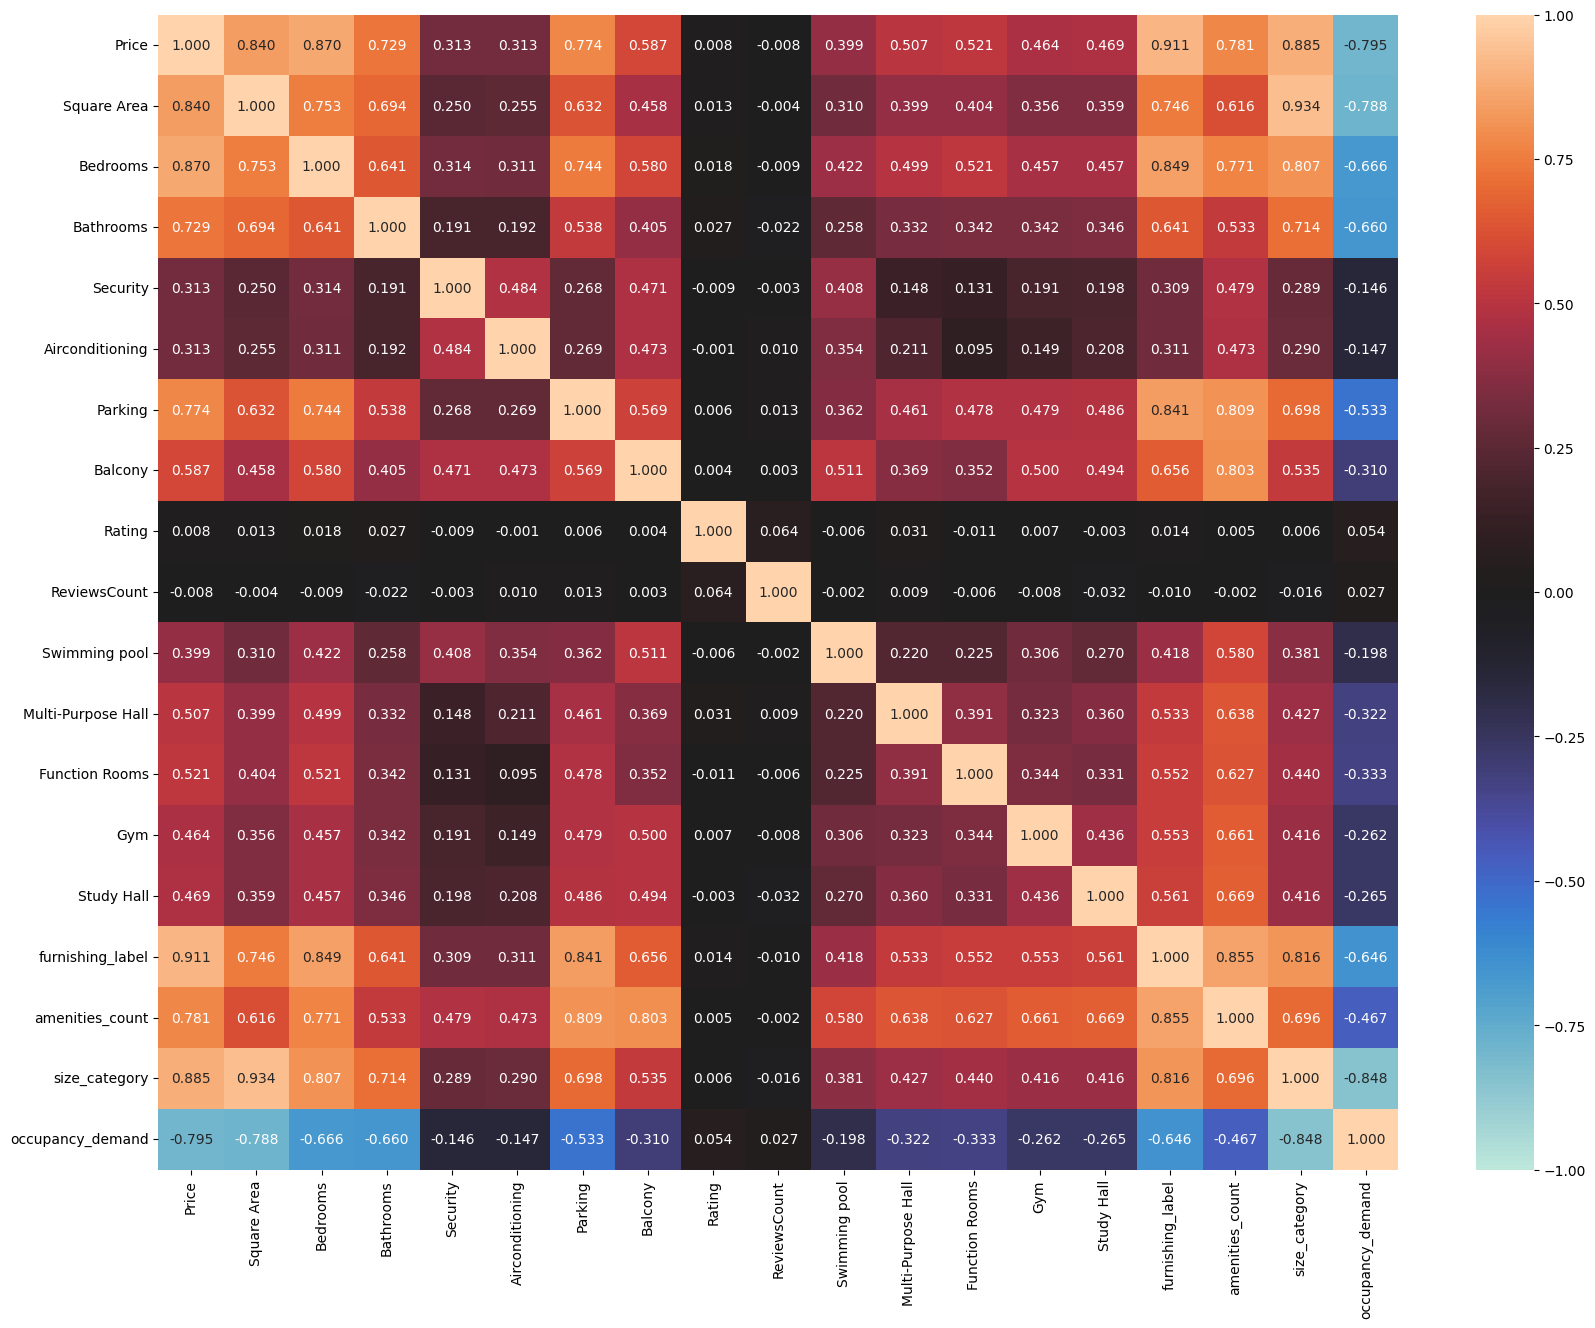

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0, fmt=".3f")
plt.show()

## **Calculating p-value and r-squared**

In [15]:
independent_variables = ['Square Area',
                         'Bedrooms',
                         'Bathrooms',
                         'Security',
                         'Airconditioning',
                         'Balcony',
                         'Rating',
                         'ReviewsCount',
                         'Swimming pool',
                         'Multi-Purpose Hall',
                         'Function Rooms',
                         'Gym',
                         'Study Hall',
                         'furnishing_label',
                         'amenities_count',
                         'size_category',
                         'occupancy_demand']

results_list = []

for col in independent_variables:
    result = pearsonr(df[col], df["Price"])
    results_list.append({
        "Independent Variable": col,
        "Correlation Coefficient": result[0],
        "R-squared": result[0]**2,
        "P-value": result[1]
    })

results_df = pd.DataFrame(results_list)
display(results_df)

,Independent Variable,Correlation Coefficient,R-squared,P-value
0,Square Area,0.840161,0.705871,0.000000e+00
1,Bedrooms,0.870431,0.757650,0.000000e+00
2,Bathrooms,0.728747,0.531072,0.000000e+00
3,Security,0.312710,0.097788,4.981462e-69
4,Airconditioning,0.313422,0.098233,2.370494e-69
5,Balcony,0.586573,0.344068,9.083694e-277
6,Rating,0.008037,0.000065,6.599890e-01
7,ReviewsCount,-0.008091,0.000065,6.578298e-01
8,Swimming pool,0.398604,0.158885,9.079536e-115
9,Multi-Purpose Hall,0.507342,0.257396,6.138615e-196


# **Model Training**
### Multiple Linear Regression

## **Model 1**
### All Features

In [16]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Security',
        'Airconditioning',
        'Parking',
        'Balcony',
        'Rating',
        'ReviewsCount',
        'Swimming pool',
        'Multi-Purpose Hall',
        'Function Rooms',
        'Gym',
        'Study Hall',
        'furnishing_label',
        'amenities_count',
        'size_category',
        'occupancy_demand']]
x = sm.add_constant(x)
y = df['Price']

In [17]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  15971.524141613969
Coefficient:  [ 0.00000000e+00  2.75338062e+02  3.60091446e+03  4.75757172e+03
  3.59219107e+03  3.41348679e+03 -4.58067079e+02 -5.83993588e+02
  1.43642262e+03  9.68577787e-02  2.07268458e+03  8.32430217e+02
  1.15487874e+03 -3.76842645e+03 -4.17977362e+03  2.43320380e+04
  2.07541066e+03 -4.83215474e+03 -1.60613479e+04]


In [18]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2253.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:50:51   Log-Likelihood:                -32287.
No. Observations:                2999   AIC:                         6.461e+04
Df Residuals:                    2981   BIC:                         6.472e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.597e+04   3702.650      4.314      0.000    8711.516    2.32e+04
Square Area          275.3381     22.380     12.303      0.000     231.456     319.220
Bedrooms            3600.9145    254.852     14.129      0.000    3101.210    4100.619
Bathrooms           4757.5717    420.770     11.307      0.000    3932.543    5582.601
Security            3592.1911   1339.793      2.681      0.007     965.179    6219.203
Airconditioning     3413.4868   1323.869      2.578      0.010     817.696    6009.277
Parking             -458.0671    776.553     -0.590      0.555   -1980.702    1064.568
Balcony             -583.9936    999.904     -0.584      0.559   -2544.565    1376.578
Rating              1436.4226    755.925      1.900      0.058     -45.766    2918.611
ReviewsCount           0.0969      0.113      0.858      0.391      -0.124       0.318
Swimming pool       2072.6846   1031.627      2.009      0.045      49.912    4095.457
Multi-Purpose Hall   832.4302    691.566      1.204      0.229    -523.565    2188.425
Function Rooms      1154.8787    666.957      1.732      0.083    -152.864    2462.622
Gym                -3768.4265    824.415     -4.571      0.000   -5384.906   -2151.947
Study Hall         -4179.7736    822.244     -5.083      0.000   -5791.997   -2567.551
furnishing_label    2.433e+04    733.797     33.159      0.000    2.29e+04    2.58e+04
amenities_count     2075.4107    228.372      9.088      0.000    1627.628    2523.194
size_category      -4832.1547    833.744     -5.796      0.000   -6466.927   -3197.383
occupancy_demand   -1.606e+04    619.033    -25.946      0.000   -1.73e+04   -1.48e+04
==============================================================================
Omnibus:                      117.431   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.088
Skew:                           0.390   Prob(JB):                     3.85e-36
Kurtosis:                       3.834   Cond. No.                     1.54e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
print(oslmod.rsquared)

0.9277861991936737


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1376,96698,90781.978776
932,2814,19086.973668
144,53728,58842.385521
1752,4991,7104.887163
51,99576,86772.754506
414,110557,121122.904390
2306,143068,143965.696985
266,86419,105129.535475
2705,44016,48466.471648
2424,12143,6124.404593


In [21]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  77530606256.78012


## **Model 2**
### Excluding Rating and ReviewCounts

In [32]:
x2 = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Security',
        'Airconditioning',
        'Parking',
        'Balcony',
        'Swimming pool',
        'Multi-Purpose Hall',
        'Function Rooms',
        'Gym',
        'Study Hall',
        'furnishing_label',
        'amenities_count',
        'size_category',
        'occupancy_demand']]
x2 = sm.add_constant(x2)
y2 = df['Price']

In [33]:
mlr_model2 = LinearRegression()

mlr_model2.fit(x2, y2)

y_pred = mlr_model2.predict(x2)
print('Intercept: ', mlr_model2.intercept_)
print('Coefficient: ', mlr_model2.coef_)

Intercept:  21896.643408121214
Coefficient:  [     0.            275.81263728   3612.56104002   4791.65013128
   3565.56249563   3419.82790442   -438.21686271   -582.99821427
   2042.69766838    902.85462836   1130.54309099  -3761.331487
  -4225.31451662  24343.68188825   2053.62470718  -4765.20088295
 -15897.95935971]


In [34]:
oslmod = sm.OLS(y2, x2).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2551.
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:00:53   Log-Likelihood:                -32289.
No. Observations:                2999   AIC:                         6.461e+04
Df Residuals:                    2983   BIC:                         6.471e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.19e+04   2007.624     10.907      0.000     1.8e+04    2.58e+04
Square Area          275.8126     22.378     12.325      0.000     231.935     319.690
Bedrooms            3612.5610    254.880     14.174      0.000    3112.803    4112.319
Bathrooms           4791.6501    420.387     11.398      0.000    3967.373    5615.928
Security            3565.5625   1340.267      2.660      0.008     937.622    6193.503
Airconditioning     3419.8279   1324.392      2.582      0.010     823.014    6016.641
Parking             -438.2169    776.267     -0.565      0.572   -1960.289    1083.856
Balcony             -582.9982   1000.245     -0.583      0.560   -2544.239    1378.242
Swimming pool       2042.6977   1031.969      1.979      0.048      19.255    4066.141
Multi-Purpose Hall   902.8546    691.045      1.307      0.191    -452.119    2257.828
Function Rooms      1130.5431    667.146      1.695      0.090    -177.570    2438.656
Gym                -3761.3315    824.743     -4.561      0.000   -5378.454   -2144.209
Study Hall         -4225.3145    821.865     -5.141      0.000   -5836.794   -2613.835
furnishing_label    2.434e+04    733.971     33.167      0.000    2.29e+04    2.58e+04
amenities_count     2053.6247    228.107      9.003      0.000    1606.362    2500.887
size_category      -4765.2009    832.797     -5.722      0.000   -6398.115   -3132.287
occupancy_demand    -1.59e+04    613.873    -25.898      0.000   -1.71e+04   -1.47e+04
==============================================================================
Omnibus:                      118.050   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.362
Skew:                           0.391   Prob(JB):                     2.04e-36
Kurtosis:                       3.839   Cond. No.                     4.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.46e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
print(oslmod.rsquared)

0.9276755017640556


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1376,96698,90781.978776
932,2814,19086.973668
144,53728,58842.385521
1752,4991,7104.887163
51,99576,86772.754506
414,110557,121122.904390
2306,143068,143965.696985
266,86419,105129.535475
2705,44016,48466.471648
2424,12143,6124.404593


In [37]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  77530606256.78012


In [38]:
print(mlr_model2.feature_names_in_)

['const' 'Square Area' 'Bedrooms' 'Bathrooms' 'Security' 'Airconditioning'
 'Parking' 'Balcony' 'Swimming pool' 'Multi-Purpose Hall' 'Function Rooms'
 'Gym' 'Study Hall' 'furnishing_label' 'amenities_count' 'size_category'
 'occupancy_demand']


In [39]:
df

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Furnishing,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label,amenities_count,size_category,occupancy_demand
0,101398,106,5,3,1,1,1,1,Fully Furnished,4.3,66.5,1,1,1,1,1,2,9,3,1
1,92131,48,4,2,1,1,1,1,Fully Furnished,4.5,152.0,1,1,1,1,1,2,9,1,2
2,42191,38,1,1,1,1,0,1,Semi Furnished,4.3,23.0,1,0,1,1,1,1,7,1,2
3,81355,40,5,1,1,1,1,1,Fully Furnished,4.4,7658.0,1,1,1,1,1,2,9,1,2
4,13066,28,0,1,1,1,0,1,Unfurnished,4.3,66.5,0,1,0,1,0,0,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,55037,39,3,1,1,1,0,1,Semi Furnished,5.0,2.0,1,1,1,1,1,1,8,1,2
2995,43142,36,3,1,1,1,1,1,Semi Furnished,3.7,187.0,1,1,0,1,1,1,8,1,2
2996,146551,92,6,2,1,1,1,1,Fully Furnished,4.3,66.5,1,1,1,1,1,2,9,3,0
2997,125605,78,6,3,1,1,1,1,Fully Furnished,4.3,66.5,1,1,1,1,1,2,9,3,0


## **Model 3**
### Excluding Features with <50% r-squared

In [402]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Parking',
        'furnishing_label',
        'amenities_count',
        'size_category',
        'occupancy_demand']]
x = sm.add_constant(x)
y = df['Price']

In [403]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  25368.109011626366
Coefficient:  [     0.            281.7005277    3920.18358011   4519.37125199
   -622.37271029  23105.69982858   1998.80235713  -4471.41320043
 -15829.76216452]


In [404]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4652.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:07:57   Log-Likelihood:                -32331.
No. Observations:                2999   AIC:                         6.468e+04
Df Residuals:                    2990   BIC:                         6.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.537e+04   1775.361     14.289      0.000    2.19e+04    2.88e+04
Square Area        281.7005     22.439     12.554      0.000     237.703     325.698
Bedrooms          3920.1836    254.894     15.380      0.000    3420.398    4419.970
Bathrooms         4519.3713    424.501     10.646      0.000    3687.027    5351.715
Parking           -622.3727    878.273     -0.709      0.479   -2344.454    1099.709
furnishing_label  2.311e+04    725.548     31.846      0.000    2.17e+04    2.45e+04
amenities_count   1998.8024    250.803      7.970      0.000    1507.039    2490.566
size_category    -4471.4132    824.948     -5.420      0.000   -6088.937   -2853.890
occupancy_demand -1.583e+04    611.700    -25.878      0.000    -1.7e+04   -1.46e+04
==============================================================================
Omnibus:                      119.055   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.376
Skew:                           0.408   Prob(JB):                     4.06e-35
Kurtosis:                       3.775   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [405]:
print(oslmod.rsquared)

0.9256264783308996


In [406]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1376,96698,90211.420214
932,2814,16085.958688
144,53728,58701.952170
1752,4991,12933.455557
51,99576,86045.331349
414,110557,121571.217081
2306,143068,143316.690327
266,86419,105196.089422
2705,44016,49434.632892
2424,12143,8449.870921


In [407]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  80577447944.5884


# **Model Training**
### Logistic Regression

In [408]:
# Check occupancy demand distribution
print("Occupancy Demand Distribution:")
print(df['occupancy_demand'].value_counts().sort_index())
print("\nOccupancy Demand Value Counts:")
print("0 = Low Occupancy:", (df['occupancy_demand'] == 0).sum())
print("1 = Medium Occupancy:", (df['occupancy_demand'] == 1).sum())
print("2 = High Occupancy:", (df['occupancy_demand'] == 2).sum())

Occupancy Demand Distribution:
occupancy_demand
0     393
1     842
2    1764
Name: count, dtype: int64

Occupancy Demand Value Counts:
0 = Low Occupancy: 393
1 = Medium Occupancy: 842
2 = High Occupancy: 1764


## **Model 1**
### All features

Logistic Regression Model 1 - All Features:
Accuracy: 0.9467
Precision (weighted): 0.9481

Classification Report:
                      precision    recall  f1-score   support

   Low Occupancy (0)       0.94      0.93      0.93        69
Medium Occupancy (1)       0.89      0.94      0.91       182
  High Occupancy (2)       0.98      0.95      0.97       349

            accuracy                           0.95       600
           macro avg       0.94      0.94      0.94       600
        weighted avg       0.95      0.95      0.95       600



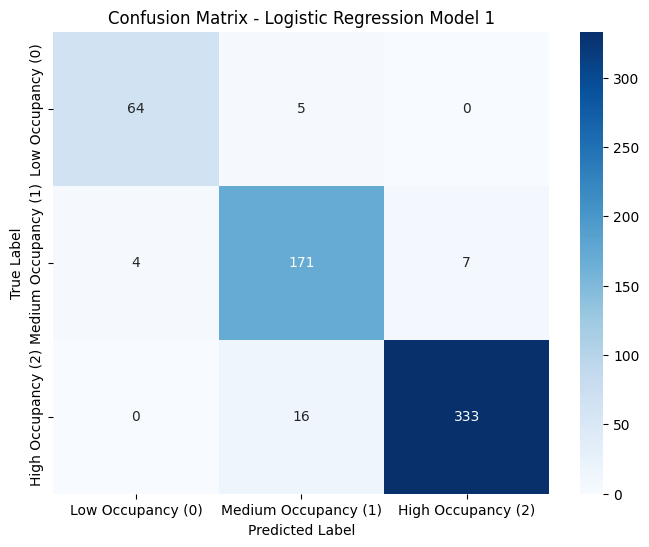

In [409]:
X_lr = df[['Square Area',
           'Bedrooms',
           'Bathrooms',
           'Security',
           'Airconditioning',
           'Parking',
           'Balcony',
           'Rating',
           'ReviewsCount',
           'Swimming pool',
           'Multi-Purpose Hall',
           'Function Rooms',
           'Gym',
           'Study Hall',
           'furnishing_label',
           'amenities_count',
           'size_category',
           'Price']]

y_lr = df['occupancy_demand']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
lr_model1 = LogisticRegression(random_state=42, max_iter=1000)
lr_model1.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr1 = lr_model1.predict(X_test_scaled)

# Calculate metrics
accuracy1 = accuracy_score(y_test, y_pred_lr1)
precision1 = precision_score(y_test, y_pred_lr1, average='weighted')

print("Logistic Regression Model 1 - All Features:")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision (weighted): {precision1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr1, target_names=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'],
            yticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model 1')
plt.show()

## **Model 2**
### Excluding Rating and ReviewsCount

Logistic Regression Model 2 - Excluding Rating and ReviewsCount:
Accuracy: 0.9500
Precision (weighted): 0.9508

Classification Report:
                      precision    recall  f1-score   support

   Low Occupancy (0)       0.94      0.96      0.95        69
Medium Occupancy (1)       0.90      0.93      0.92       182
  High Occupancy (2)       0.98      0.96      0.97       349

            accuracy                           0.95       600
           macro avg       0.94      0.95      0.95       600
        weighted avg       0.95      0.95      0.95       600



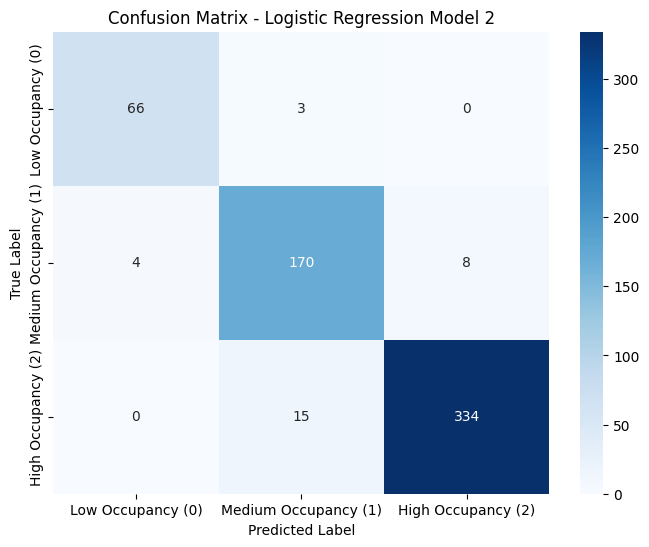

In [410]:
X_lr2 = df[['Square Area',
            'Bedrooms',
            'Bathrooms',
            'Security',
            'Airconditioning',
            'Parking',
            'Balcony',
            'Swimming pool',
            'Multi-Purpose Hall',
            'Function Rooms',
            'Gym',
            'Study Hall',
            'furnishing_label',
            'amenities_count',
            'size_category',
            'Price']]

y_lr2 = df['occupancy_demand']

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lr2, y_lr2, test_size=0.2, random_state=42)

# Scale the features
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

# Train the logistic regression model
lr_model2 = LogisticRegression(random_state=42, max_iter=1000)
lr_model2.fit(X_train2_scaled, y_train2)

# Make predictions
y_pred_lr2 = lr_model2.predict(X_test2_scaled)

# Calculate metrics
accuracy2 = accuracy_score(y_test2, y_pred_lr2)
precision2 = precision_score(y_test2, y_pred_lr2, average='weighted')

print("Logistic Regression Model 2 - Excluding Rating and ReviewsCount:")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision (weighted): {precision2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_lr2, target_names=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)']))

# Confusion matrix
conf_matrix2 = confusion_matrix(y_test2, y_pred_lr2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'],
            yticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model 2')
plt.show()

## **Model 3**
### High Correlation Features with Occupancy Demand | Features with > 0.3 Correlation

In [411]:
occupancy_correlations = df.corr(numeric_only=True)['occupancy_demand'].sort_values(ascending=False)
print("Correlation of features with occupancy_demand:")
print(occupancy_correlations)

high_corr_features = occupancy_correlations[abs(occupancy_correlations) > 0.3].index.tolist()
high_corr_features.remove('occupancy_demand')
print("\nFeatures with correlation > 0.3:")
print(high_corr_features)

Correlation of features with occupancy_demand:
occupancy_demand      1.000000
Rating                0.053966
ReviewsCount          0.026586
Security             -0.146177
Airconditioning      -0.146884
Swimming pool        -0.197645
Gym                  -0.261728
Study Hall           -0.265396
Balcony              -0.310490
Multi-Purpose Hall   -0.321758
Function Rooms       -0.332969
amenities_count      -0.466551
Parking              -0.533185
furnishing_label     -0.645772
Bathrooms            -0.659871
Bedrooms             -0.665962
Square Area          -0.787538
Price                -0.794736
size_category        -0.848023
Name: occupancy_demand, dtype: float64

Features with correlation > 0.3:
['Balcony', 'Multi-Purpose Hall', 'Function Rooms', 'amenities_count', 'Parking', 'furnishing_label', 'Bathrooms', 'Bedrooms', 'Square Area', 'Price', 'size_category']


Logistic Regression Model 3 - High Correlation Features Only:
Features used: ['Balcony', 'Multi-Purpose Hall', 'Function Rooms', 'amenities_count', 'Parking', 'furnishing_label', 'Bathrooms', 'Bedrooms', 'Square Area', 'Price', 'size_category']
Accuracy: 0.9500
Precision (weighted): 0.9508

Classification Report:
                      precision    recall  f1-score   support

   Low Occupancy (0)       0.94      0.96      0.95        69
Medium Occupancy (1)       0.90      0.93      0.92       182
  High Occupancy (2)       0.98      0.96      0.97       349

            accuracy                           0.95       600
           macro avg       0.94      0.95      0.95       600
        weighted avg       0.95      0.95      0.95       600



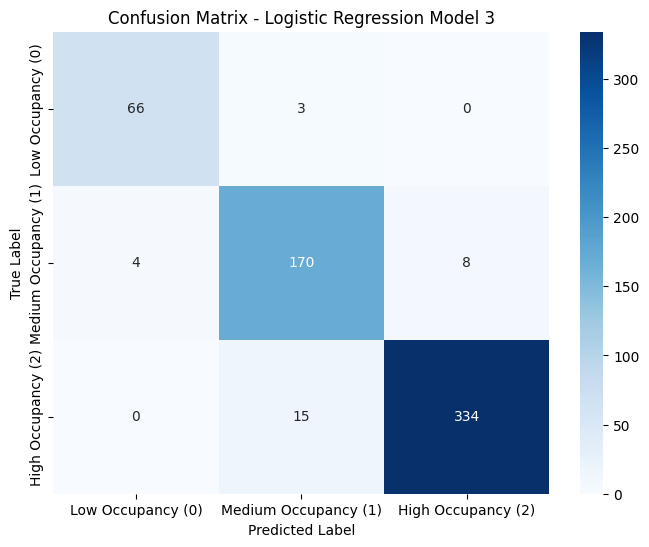

In [412]:
X_lr3 = df[high_corr_features]

y_lr3 = df['occupancy_demand']

# Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_lr3, y_lr3, test_size=0.2, random_state=42)

# Scale the features
scaler3 = StandardScaler()
X_train3_scaled = scaler3.fit_transform(X_train3)
X_test3_scaled = scaler3.transform(X_test3)

# Train the logistic regression model
lr_model3 = LogisticRegression(random_state=42, max_iter=1000)
lr_model3.fit(X_train3_scaled, y_train3)

# Make predictions
y_pred_lr3 = lr_model3.predict(X_test3_scaled)

# Calculate metrics
accuracy3 = accuracy_score(y_test3, y_pred_lr3)
precision3 = precision_score(y_test3, y_pred_lr3, average='weighted')

print("Logistic Regression Model 3 - High Correlation Features Only:")
print(f"Features used: {high_corr_features}")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision (weighted): {precision3:.4f}")
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_lr3, target_names=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)']))

# Confusion matrix
conf_matrix3 = confusion_matrix(y_test3, y_pred_lr3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'],
            yticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model 3')
plt.show()

In [413]:
import pickle

# Save MLR Model 2
with open('mlr_model2.pkl', 'wb') as f:
    pickle.dump(mlr_model2, f)

# Save Logistic Regression Model 2
with open('lr_model2.pkl', 'wb') as f:
    pickle.dump(lr_model2, f)

print("MLR Model 2 and Logistic Regression Model 2 have been saved as 'mlr_model2.pkl' and 'lr_model2.pkl'.")

MLR Model 2 and Logistic Regression Model 2 have been saved as 'mlr_model2.pkl' and 'lr_model2.pkl'.
